In [1]:
from matplotlib import pyplot as plt
from whar_datasets.adapters.pytorch import PytorchAdapter
from whar_datasets.support.getter import WHARDatasetID, get_whar_cfg

In [2]:
cfg = get_whar_cfg(WHARDatasetID.UCI_HAR)
dataset = PytorchAdapter(cfg, override_cache=False)

Creating config hash...
Checking download...
Download exists.
Checking sessions...
Sessions exist.
Validating common format...
[########################################] | 100% Completed | 753.75 ms
Common format validated.
Checking windowing...
Loading config hash...
Config hash mismatch.
Selecting activities...
[########################################] | 100% Completed | 1.28 sms


Caching windows: 100%|██████████| 9499/9499 [00:07<00:00, 1299.50it/s]

subject_ids: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
activity_ids: [0 1 2 3 4 5]


In [3]:
train_loader, val_loader, test_loader = dataset.get_dataloaders(
    train_batch_size=32, scv_group_index=2, override_cache=False
)

train: 7046 | val: 782 | test: 1671
Postprocessing...


Loading windows: 100%|██████████| 9499/9499 [00:06<00:00, 1418.25it/s]


Getting normalization parameters...
Loading config hash...
Creating normalization parameters hash...
Loading normalization parameters hash...


Caching samples: 100%|██████████| 9499/9499 [00:01<00:00, 9064.03it/s]


In [4]:
weights = dataset.get_class_weights(test_loader)
print(weights)

{2: 0.6968517014613271, 0: 0.7306023536688557, 1: 0.7724139341499047, 3: 1.0257657045510735, 5: 1.3496917165145703, 4: 1.4246745896542687}


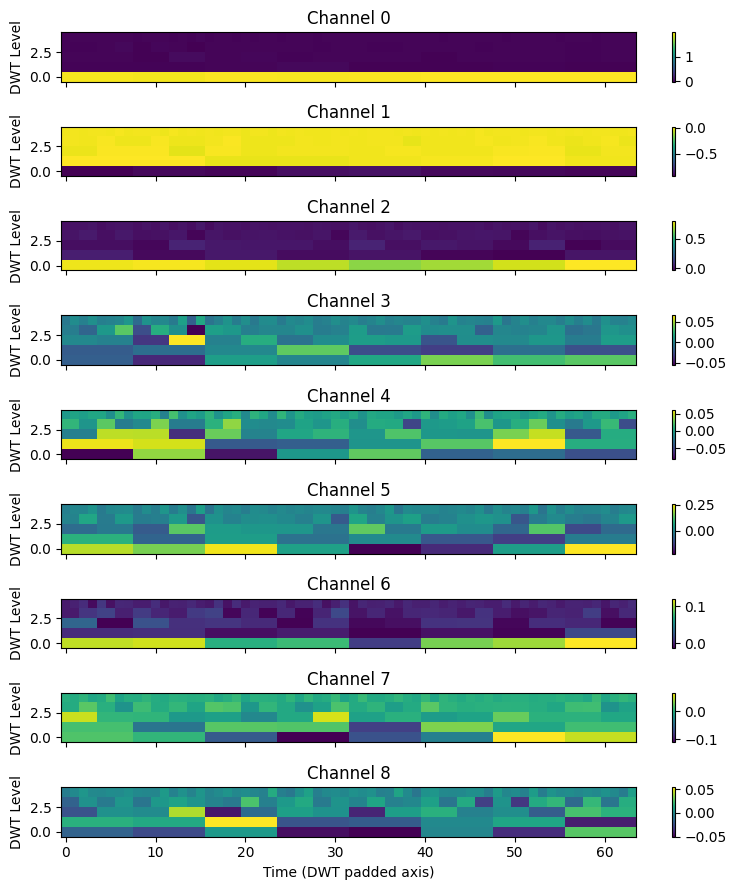

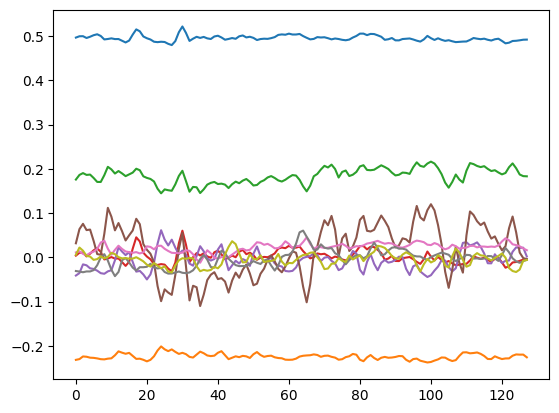

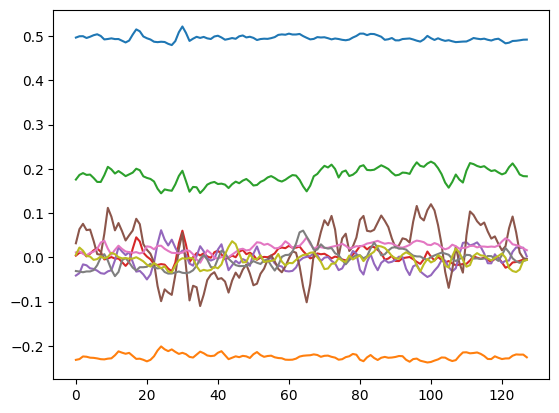

In [9]:
from whar_datasets.core.features.wavelet_transform import (
    dtw_grid_to_signal,
    plot_dwt_grid,
)


y_batch, x_batch, grid_batch, lengths_batch = next(iter(train_loader))

plot_dwt_grid(grid_batch[0])

grid = grid_batch[0].numpy()
lengths = lengths_batch[0].int().numpy()
x = x_batch[0].numpy()

signal_recon = dtw_grid_to_signal(grid, lengths)
plt.plot(x)
plt.show()
plt.plot(signal_recon)
plt.show()